<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0616_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST 모델

## 데이터 로드

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

- 학습 데이터는 이미지라서 0~255의 값을 가지고 있고, 이를 이미지로 imshow()를 이용해 출력합니다. 값의 범위를 보기 위해 colorbar()를 이용해 출력

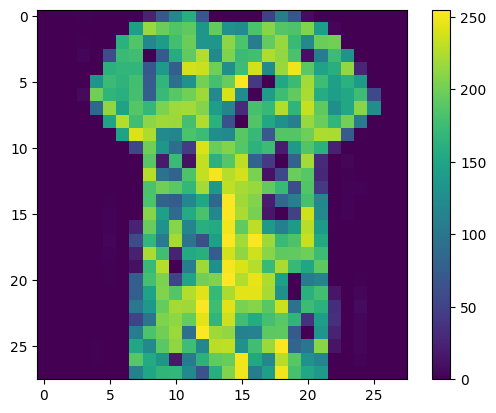

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

- Fashion MNIST 데이터셋을 확인하기 위해서 전체 학습 데이터 60,000개 중에서 랜덤으로 4개를 선택하여 인덱스와 레이블, 그리고 해당 패션 이미지를 출력

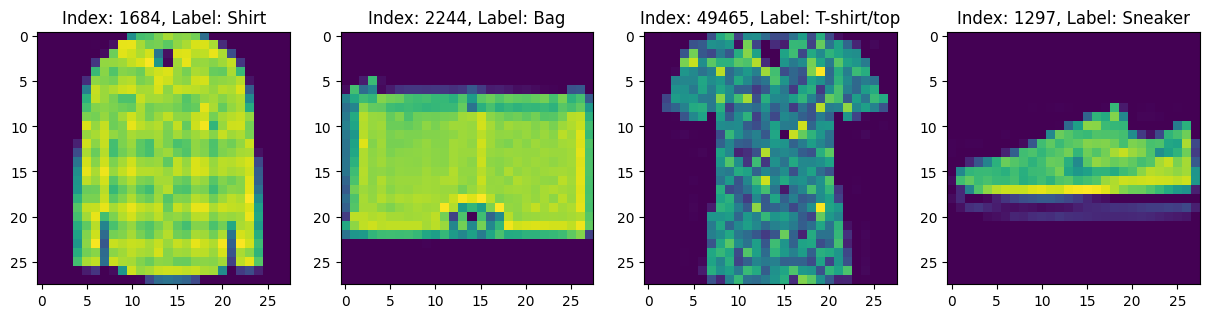

In [12]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

## 데이터 전처리

In [13]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


- 딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어줍니다. 여기서 reshape()을 할 때, 훈련 데이터는 (42000, 784), 검증 데이터는 (18000, 784), 테스트 데이터는 (10000, 784)로 지정해도 되지만, 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 하였다.

In [14]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape( -1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


- 학습 데이터 중에서 0번째 값을 출력해보면, 0부터 255까지의 숫자로 구성되어 있기 때문에 숫자의 범위를 전처리를 통해서 줄여줄 필요가 있습니다.

In [15]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [16]:
# 기존 데이터셋을 255.0으로 나눠주면 0~1의 범위로 줄일 수 있다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성
- Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용합니다. 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 하고, 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가합니다. 그리고 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가

In [18]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape = (784, )))
model.add(layers.Dense(512, activation = 'sigmoid'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 모델에 사용할 옵티마이저는 SGD를 사용
# 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정
# 지표는 accuracy를 사용
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [20]:
# Fashion MNIST 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 60으로 지정하며, 배치 사이즈는 512로 지정하고, 검증을 위해서는 검증 데이터로 분리시킨 x_val와 y_val를 지정하여 fit() 함수를 실행

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2753 - loss: 2.2261 - val_accuracy: 0.4493 - val_loss: 1.9951
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5672 - loss: 1.9307 - val_accuracy: 0.6256 - val_loss: 1.7742
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6438 - loss: 1.7193 - val_accuracy: 0.5818 - val_loss: 1.5996
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6425 - loss: 1.5545 - val_accuracy: 0.6772 - val_loss: 1.4626
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6837 - loss: 1.4264 - val_accuracy: 0.6894 - val_loss: 1.3498
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6920 - loss: 1.3239 - val_accuracy: 0.6944 - val_loss: 1.2593
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7034 - loss: 1.2380 - val_accuracy: 0.6965 - val_loss: 1.1905
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7108 - loss: 1.1690 - val_accuracy: 0.7051 - v

In [21]:
# 모델의 학습 과정을 저장한 history에 포함되어 있는 loss, val_loss, accuracy, val_accuracy를 차트로 시각화

def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

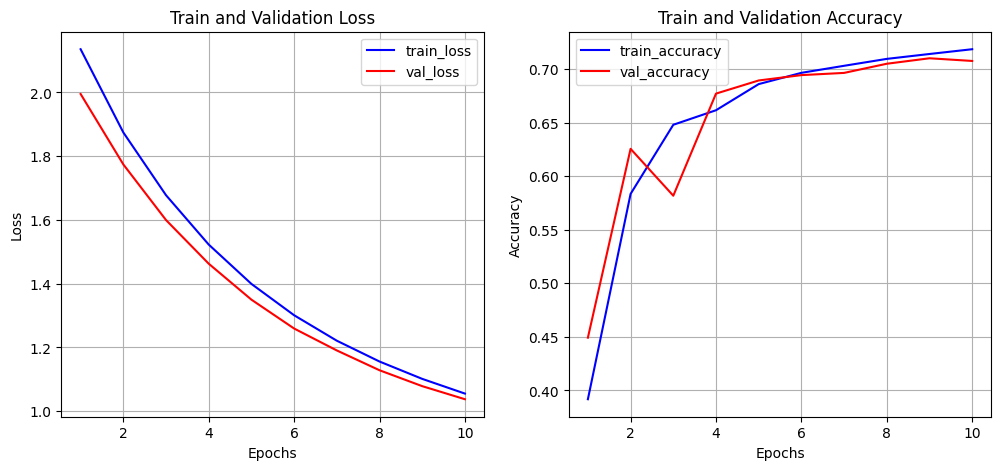

In [23]:
# 정의한 show_history() 함수를 이용해 모델 학습 결과인 history를 시각화
show_history(history)

## 모델 평가 및 예측
- 모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행


In [24]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7076 - loss: 1.0460


[1.0440820455551147, 0.7059000134468079]

- 학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행시킵니다. 테스트 데이터 셋인 x_test에 대해 모델의 예측 결과인 pred_ys 중에 5번째를 출력해보면, 분류 10개마다 얼만큼의 비율로 예측했는지 알 수 있습니다.

- 분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장합니다. 그리고 예시로 5번째를 출력해보면 결과로 1이 나오는 것을 알 수 있습니다. 인덱스 1에 해당하는 클래스가 무엇인지 class_names 리스트에서 가져오면 Trouser가 출력되는 것을 알 수 있습니다.

In [25]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0.13231042 0.5427855  0.0293721  0.17586812 0.04433993 0.01029882
 0.04889528 0.00550453 0.00747851 0.00314663]
1
Trouser


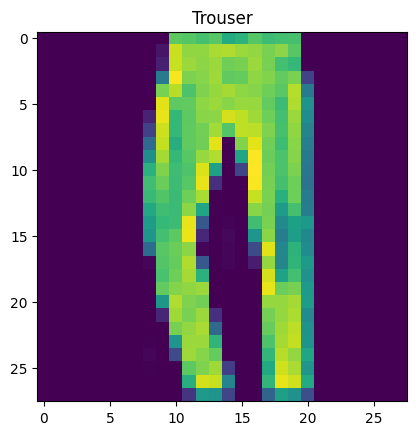

In [26]:
# 이미지와 모델이 예측함 결과값을 한 번에 출력
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

- 이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의합니다. 모델이 예측한 값인 pred_ys, 테스트 데이터셋의 정답인 y_test, 그리고 이미지 img에 대해서 i 번째를 가져와서 출력을 수행합니다. 여기서 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고, 다르면 red 색을 사용하도록 지정합니다. 이제 예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력합니다.

In [27]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

- 전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의합니다. 예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화합니다. 기본적으로는 색을 darkgray로 지정하고, 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시

In [28]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

- 5번째 데이터에 대해서 정의한 plot_image()와 plot_class() 함수를 호출하여 시각화합니다. 결과를 보면 모델이 Trouser라고 95% 확률로 예측한 것을 알 수 있습니다.

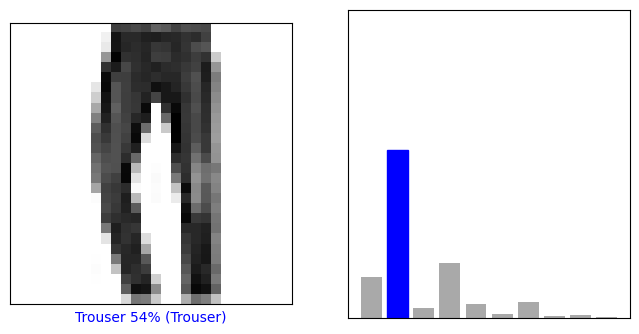

In [29]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

- 10번째 데이터에 대해서도 마찬가지로 출력을 합니다. 그러나 결과를 보면, 모델은 Pullover로 예측을 했지만, 실제 정답은 Coat인 것으로 알 수 있습니다.

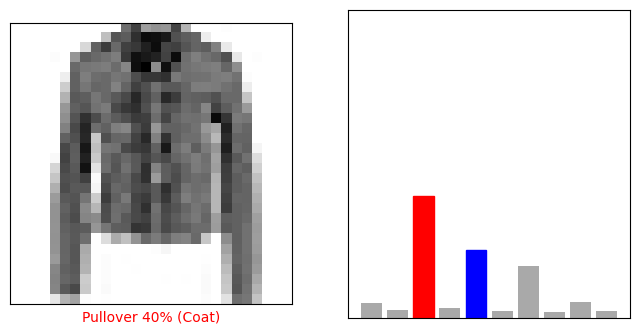

In [30]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

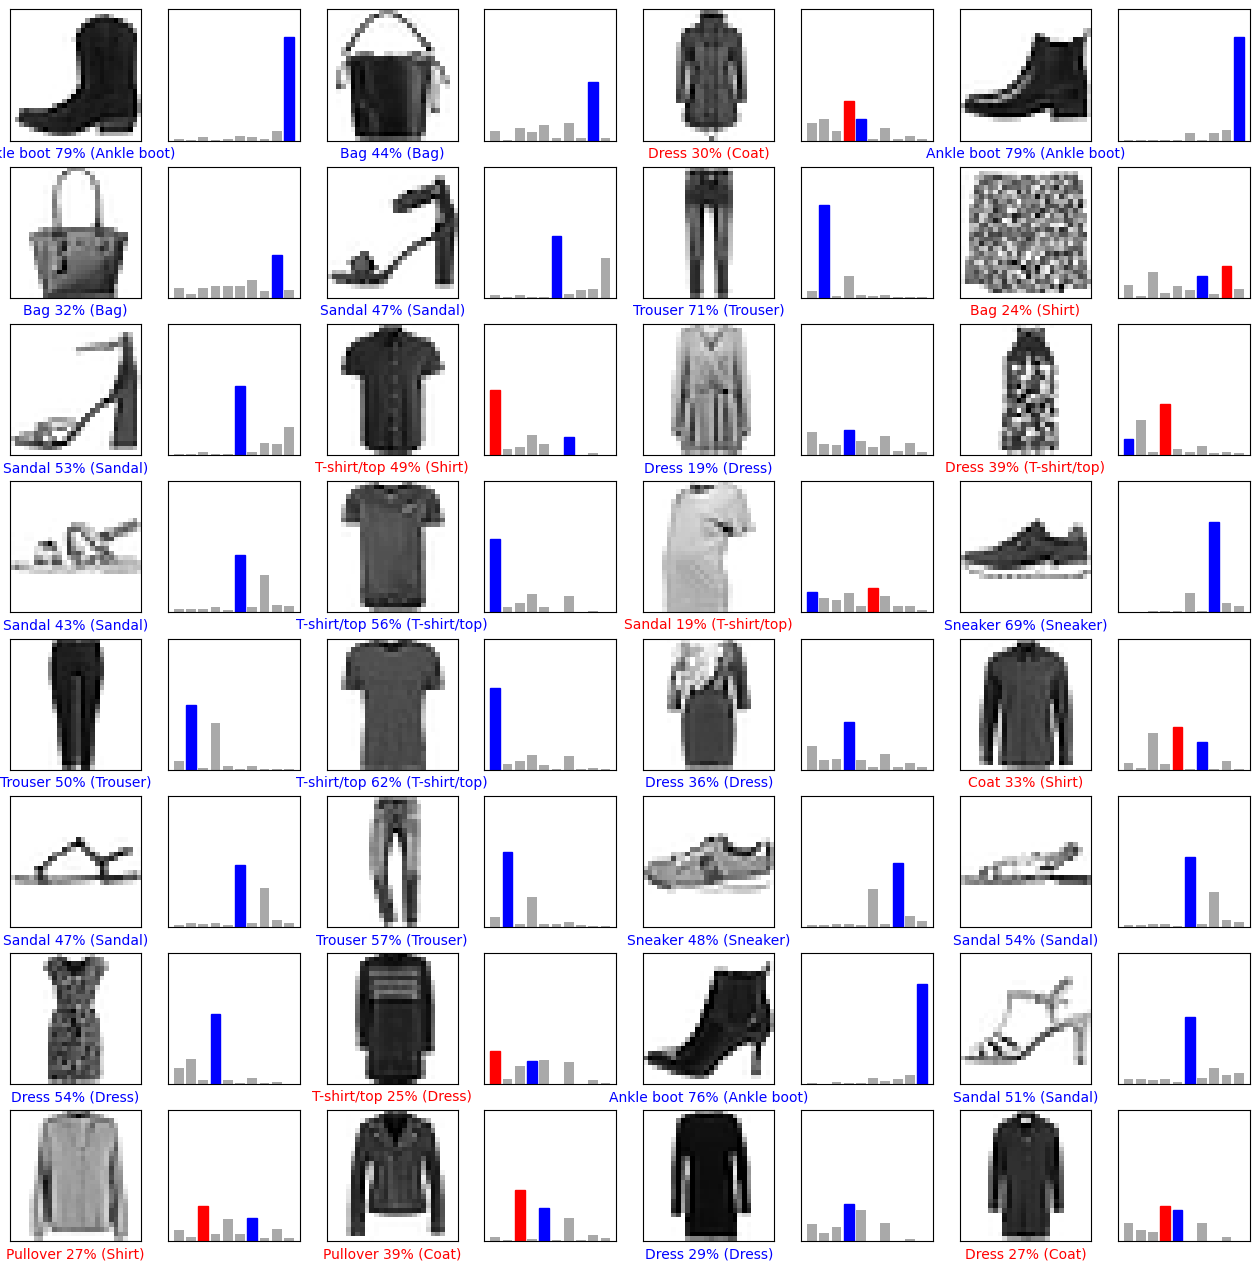

In [31]:
# 32개를 출력
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

- classification_report를 이용하여 Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별로 precision, recall, f1-score, support를 살펴볼 수 있습니다.

In [32]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.69      0.78      0.73      1000
     Trouser       0.97      0.89      0.93      1000
    Pullover       0.47      0.71      0.56      1000
       Dress       0.67      0.86      0.75      1000
        Coat       0.58      0.42      0.49      1000
      Sandal       0.67      0.69      0.68      1000
       Shirt       0.51      0.10      0.17      1000
     Sneaker       0.74      0.87      0.80      1000
         Bag       0.89      0.85      0.87      1000
  Ankle boot       0.84      0.89      0.87      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.68     10000
weighted avg       0.70      0.71      0.68     10000



- confusion_matrix를 이용해서 예측한 레이블과 실제 레이블과의 일치 여부를 혼동 행렬(confusion matrix)로 시각화

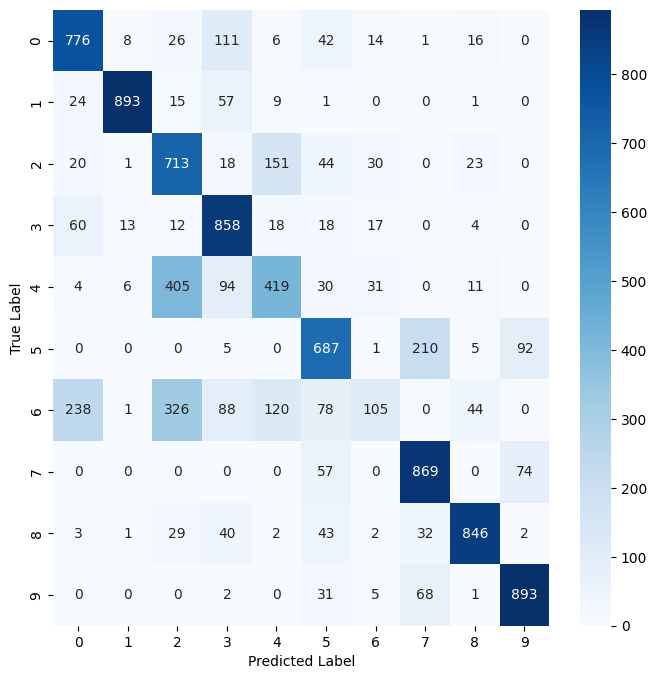

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 모델 최적화

### Early Stopping
- 딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록 콜백 함수로 ModelCheckpoint를 사용해 봅시다. 또한 val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료되도록 EarlyStopping을 사용
- 정의한 콜백 함수를 사용하여 fit() 함수를 실행하여 실제 모델 학습을 진행




In [35]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7550 - loss: 0.7299

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7551 - loss: 0.7297 - val_accuracy: 0.7715 - val_loss: 0.6678
Epoch 2/10
1290/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7766 - loss: 0.6510

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7766 - loss: 0.6508 - val_accuracy: 0.7833 - val_loss: 0.6242
Epoch 3/10
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.6065

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7899 - loss: 0.6065 - val_accuracy: 0.7901 - val_loss: 0.5936
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.5803

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7968 - loss: 0.5803 - val_accuracy: 0.8041 - val_loss: 0.5688
Epoch 5/10
1294/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.5571

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8073 - loss: 0.5570 - val_accuracy: 0.8071 - val_loss: 0.5548
Epoch 6/10
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8150 - loss: 0.5357

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8150 - loss: 0.5357 - val_accuracy: 0.8135 - val_loss: 0.5359
Epoch 7/10
1296/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.5168

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8215 - loss: 0.5169 - val_accuracy: 0.8180 - val_loss: 0.5236
Epoch 8/10
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.5071

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8252 - loss: 0.5071 - val_accuracy: 0.8231 - val_loss: 0.5146
Epoch 9/10
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.5006

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8239 - loss: 0.5006 - val_accuracy: 0.8252 - val_loss: 0.5037
Epoch 10/10
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.4842

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8282 - loss: 0.4842 - val_accuracy: 0.8257 - val_loss: 0.4991


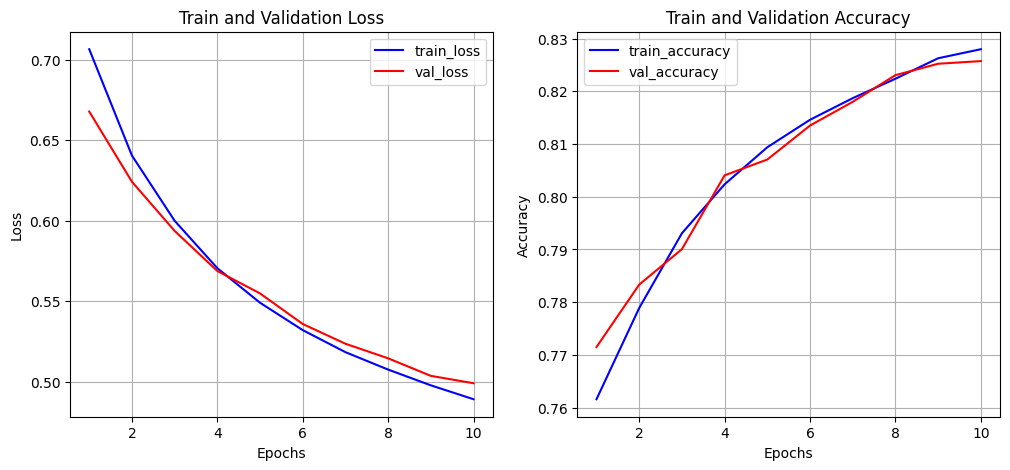

In [36]:
show_history(history)

In [37]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8220 - loss: 0.5093


[0.5170659422874451, 0.8154000043869019]

## 활성화 함수
기존 모델에서는 활성화 함수로 선형 함수인 sigmoid를 사용하였는데, 비선형 함수인 relu로 변경하여 학습이 어떻게 진행되는지 살펴봅니다

In [38]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape = (784, )))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# 모델에 사용할 옵티마이저는 SGD를 사용
# 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정
# 지표는 accuracy를 사용
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [41]:
history2 = model.fit(x_train, y_train, epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6759 - loss: 1.0347 - val_accuracy: 0.8109 - val_loss: 0.5778
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8170 - loss: 0.5513 - val_accuracy: 0.8299 - val_loss: 0.5080
Epoch 3/10
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.4908

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8321 - loss: 0.4907 - val_accuracy: 0.8414 - val_loss: 0.4742
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8461 - loss: 0.4518 - val_accuracy: 0.8358 - val_loss: 0.4776
Epoch 5/10
1292/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8468 - loss: 0.4381

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8469 - loss: 0.4380 - val_accuracy: 0.8463 - val_loss: 0.4483
Epoch 6/10
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.4231

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8535 - loss: 0.4231 - val_accuracy: 0.8495 - val_loss: 0.4377
Epoch 7/10
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.4058

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8584 - loss: 0.4058 - val_accuracy: 0.8549 - val_loss: 0.4213
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8608 - loss: 0.3992 - val_accuracy: 0.8597 - val_loss: 0.4247
Epoch 9/10
1295/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3920

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8650 - loss: 0.3920 - val_accuracy: 0.8548 - val_loss: 0.4193
Epoch 10/10
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8685 - loss: 0.3776

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8685 - loss: 0.3776 - val_accuracy: 0.8611 - val_loss: 0.4050


In [42]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

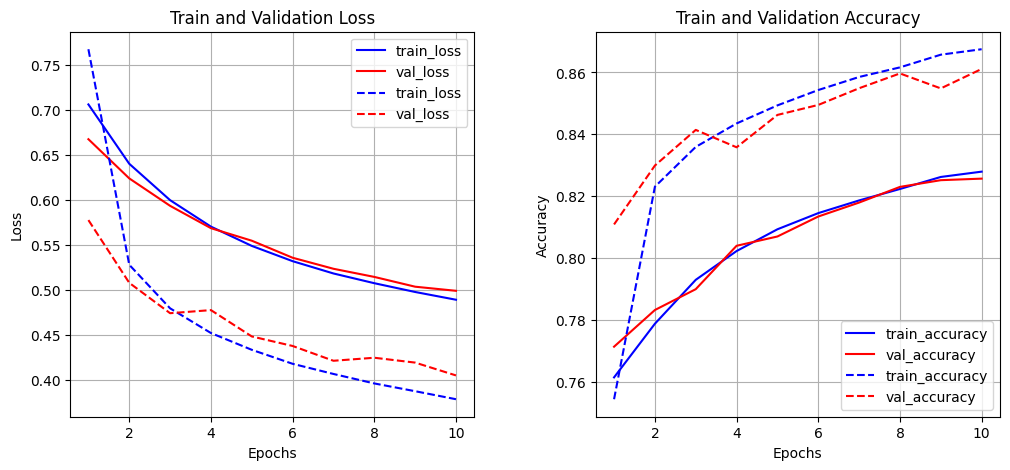

In [43]:
diff_history(history, history2)

In [44]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.4208


[0.42416971921920776, 0.8500999808311462]

### 옵티마이저
기존 모델에서는 옵티마이저로 SGD를 사용했는데, 좀 더 빠르고 효과적인 학습이 가능하도록 Adam으로 변경

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [47]:
history3 = model.fit(x_train, y_train, epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8537 - loss: 0.4001

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8537 - loss: 0.4001 - val_accuracy: 0.8552 - val_loss: 0.3981
Epoch 2/10
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8703 - loss: 0.3522

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8704 - loss: 0.3521 - val_accuracy: 0.8596 - val_loss: 0.3843
Epoch 3/10
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8828 - loss: 0.3118

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8828 - loss: 0.3118 - val_accuracy: 0.8707 - val_loss: 0.3763
Epoch 4/10
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8899 - loss: 0.2933

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8899 - loss: 0.2934 - val_accuracy: 0.8812 - val_loss: 0.3364
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8986 - loss: 0.2756 - val_accuracy: 0.8779 - val_loss: 0.3459
Epoch 6/10
1297/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8987 - loss: 0.2649

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8987 - loss: 0.2649 - val_accuracy: 0.8866 - val_loss: 0.3326
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9054 - loss: 0.2520 - val_accuracy: 0.8830 - val_loss: 0.3353
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9107 - loss: 0.2403 - val_accuracy: 0.8891 - val_loss: 0.3377
Epoch 9/10
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9127 - loss: 0.2304

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9127 - loss: 0.2304 - val_accuracy: 0.8877 - val_loss: 0.3290
Epoch 10/10
1299/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9171 - loss: 0.2199

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9171 - loss: 0.2200 - val_accuracy: 0.8917 - val_loss: 0.3277


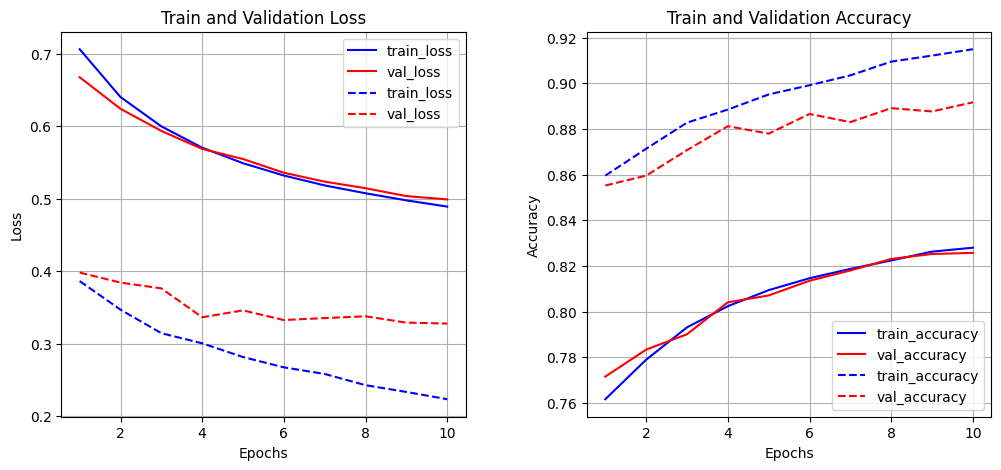

In [48]:
diff_history(history, history3)

In [49]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.3539


[0.3489737808704376, 0.8805000185966492]

### 규제

In [56]:
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Input(shape = (784, )))
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [59]:
history4 = model.fit(x_train, y_train,
                     epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8324 - loss: 0.6506 - val_accuracy: 0.8108 - val_loss: 0.6503
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8400 - loss: 0.5548 - val_accuracy: 0.8387 - val_loss: 0.5398
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8483 - loss: 0.5166 - val_accuracy: 0.8521 - val_loss: 0.5227
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8574 - loss: 0.4842 - val_accuracy: 0.8514 - val_loss: 0.5007
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8615 - loss: 0.4712 - val_accuracy: 0.8511 - val_loss: 0.4943
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8681 - loss: 0.4419 - val_accuracy: 0.8591 - val_loss: 0.4695
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8682 - loss: 0.4390 - val_accuracy: 0.8656 - val_loss: 0.4556
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8717 - loss: 0.4351 

In [ ]:
diff_history(history, history4)

### 드롭아웃


In [50]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape = (784, )))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [53]:
history5 = model.fit(x_train, y_train,
                     epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7396 - loss: 0.7358 - val_accuracy: 0.8452 - val_loss: 0.4323
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8306 - loss: 0.4642 - val_accuracy: 0.8498 - val_loss: 0.4174
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8470 - loss: 0.4223 - val_accuracy: 0.8500 - val_loss: 0.3962
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8533 - loss: 0.4001 - val_accuracy: 0.8629 - val_loss: 0.3762
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8587 - loss: 0.3798 - val_accuracy: 0.8723 - val_loss: 0.3556
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8657 - loss: 0.3651 - val_accuracy: 0.8774 - val_loss: 0.3466
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8693 - loss: 0.3545 - val_accuracy: 0.8791 - val_loss: 0.3367
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8732 - loss: 0.34

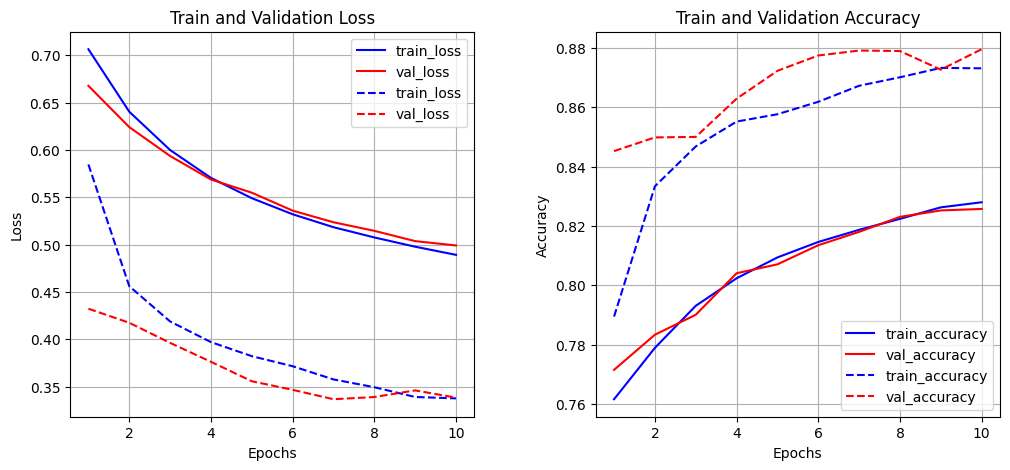

In [54]:
diff_history(history, history5)

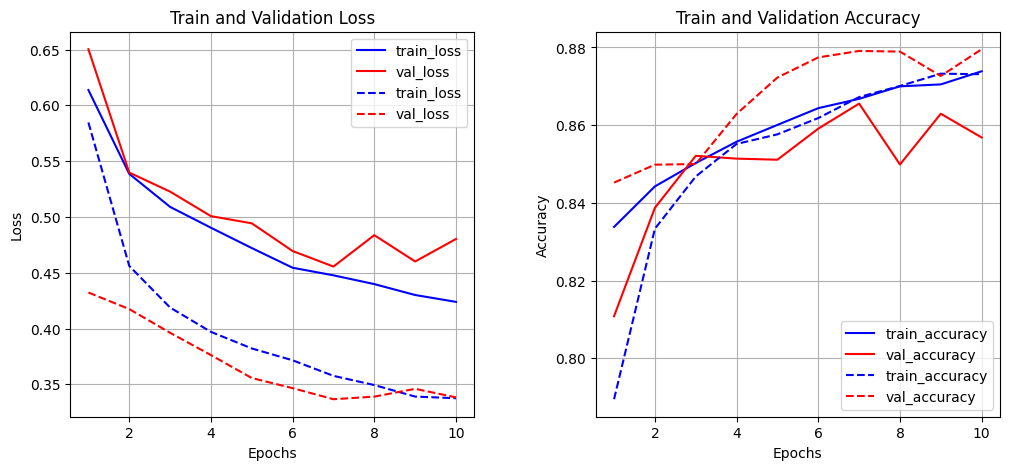

In [60]:
diff_history(history4, history5)

In [61]:
# 드롭아웃 적용 모델의 평가 결과를 확인
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.4752


[0.4780195653438568, 0.8587999939918518]

## 배치 정규화


In [63]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Input(shape = (784, )))
model.add(layers.Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [64]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [65]:
history6 = model.fit(x_train, y_train,
                     epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7961 - loss: 0.5876 - val_accuracy: 0.8353 - val_loss: 0.4680
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8467 - loss: 0.4291 - val_accuracy: 0.8559 - val_loss: 0.4189
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8588 - loss: 0.3880 - val_accuracy: 0.8668 - val_loss: 0.3875
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8672 - loss: 0.3665 - val_accuracy: 0.8659 - val_loss: 0.3795
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8733 - loss: 0.3479 - val_accuracy: 0.8611 - val_loss: 0.3976
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8795 - loss: 0.3273 - val_accuracy: 0.8731 - val_loss: 0.3594
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8831 - loss: 0.3178 - val_accuracy: 0.8656 - val_loss: 0.3879
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8875 - loss: 0.3054

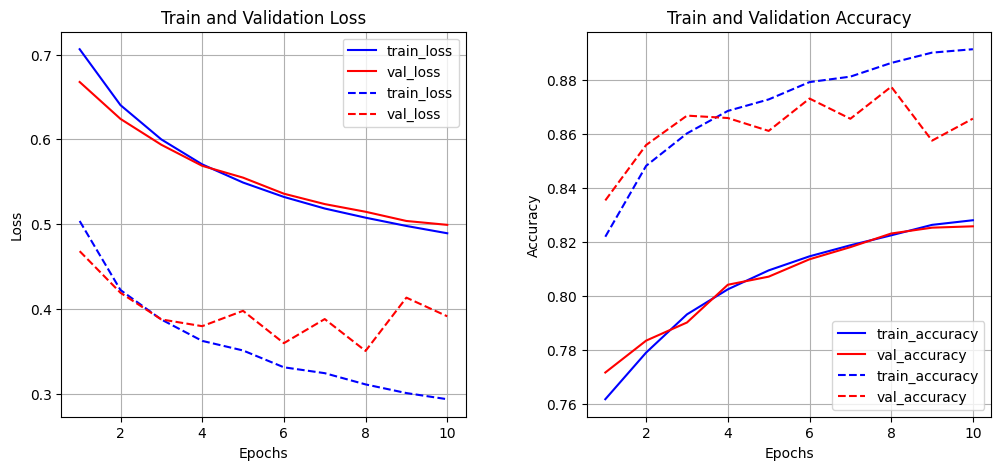

In [67]:
diff_history(history, history6)

In [68]:
model.evaluate(x_test, y_test)

ValueError: You must call `compile()` before using the model.

### 배치 정규화 + 드롭아웃
- 배치 정규화를 통해 안정적이 학습이 가능하지만, 규제 방법 중 좋은 성능을 보였던 드롭어웃을 함께 적용

In [69]:
model = models.Sequential()
model.add(layers.Input( shape = (784, )))
model.add(layers.Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [70]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [71]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7519 - loss: 0.7317 - val_accuracy: 0.8259 - val_loss: 0.4701
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8262 - loss: 0.4935 - val_accuracy: 0.8556 - val_loss: 0.4162
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8298 - loss: 0.4741 - val_accuracy: 0.8514 - val_loss: 0.4169
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8382 - loss: 0.4480 - val_accuracy: 0.8595 - val_loss: 0.3961
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8420 - loss: 0.4353 - val_accuracy: 0.8467 - val_loss: 0.4178
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8453 - loss: 0.4258 - val_accuracy: 0.8558 - val_loss: 0.4112
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8510 - loss: 0.4161 - val_accuracy: 0.8652 - val_loss: 0.3777
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8514 - loss: 0

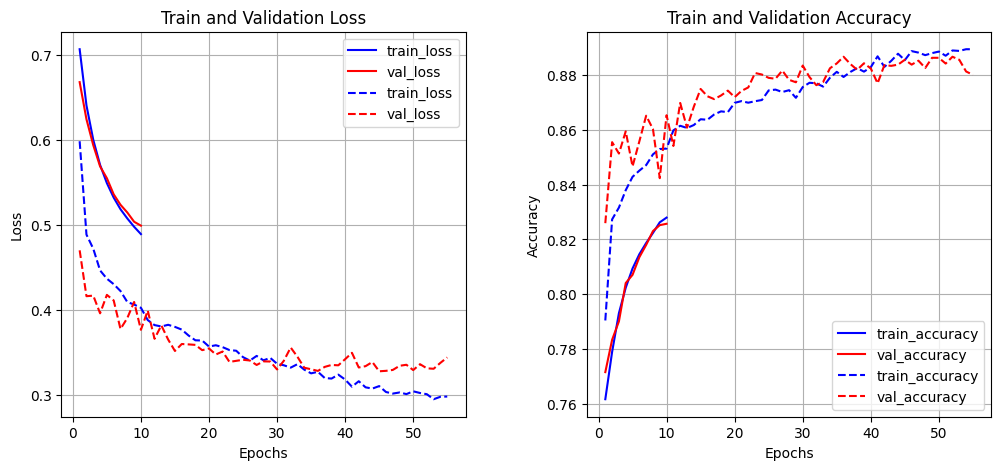

In [72]:
diff_history(history, history7)

In [73]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - loss: 0.3515


[0.35820767283439636, 0.8744999766349792]

## 모델 결과 분석


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


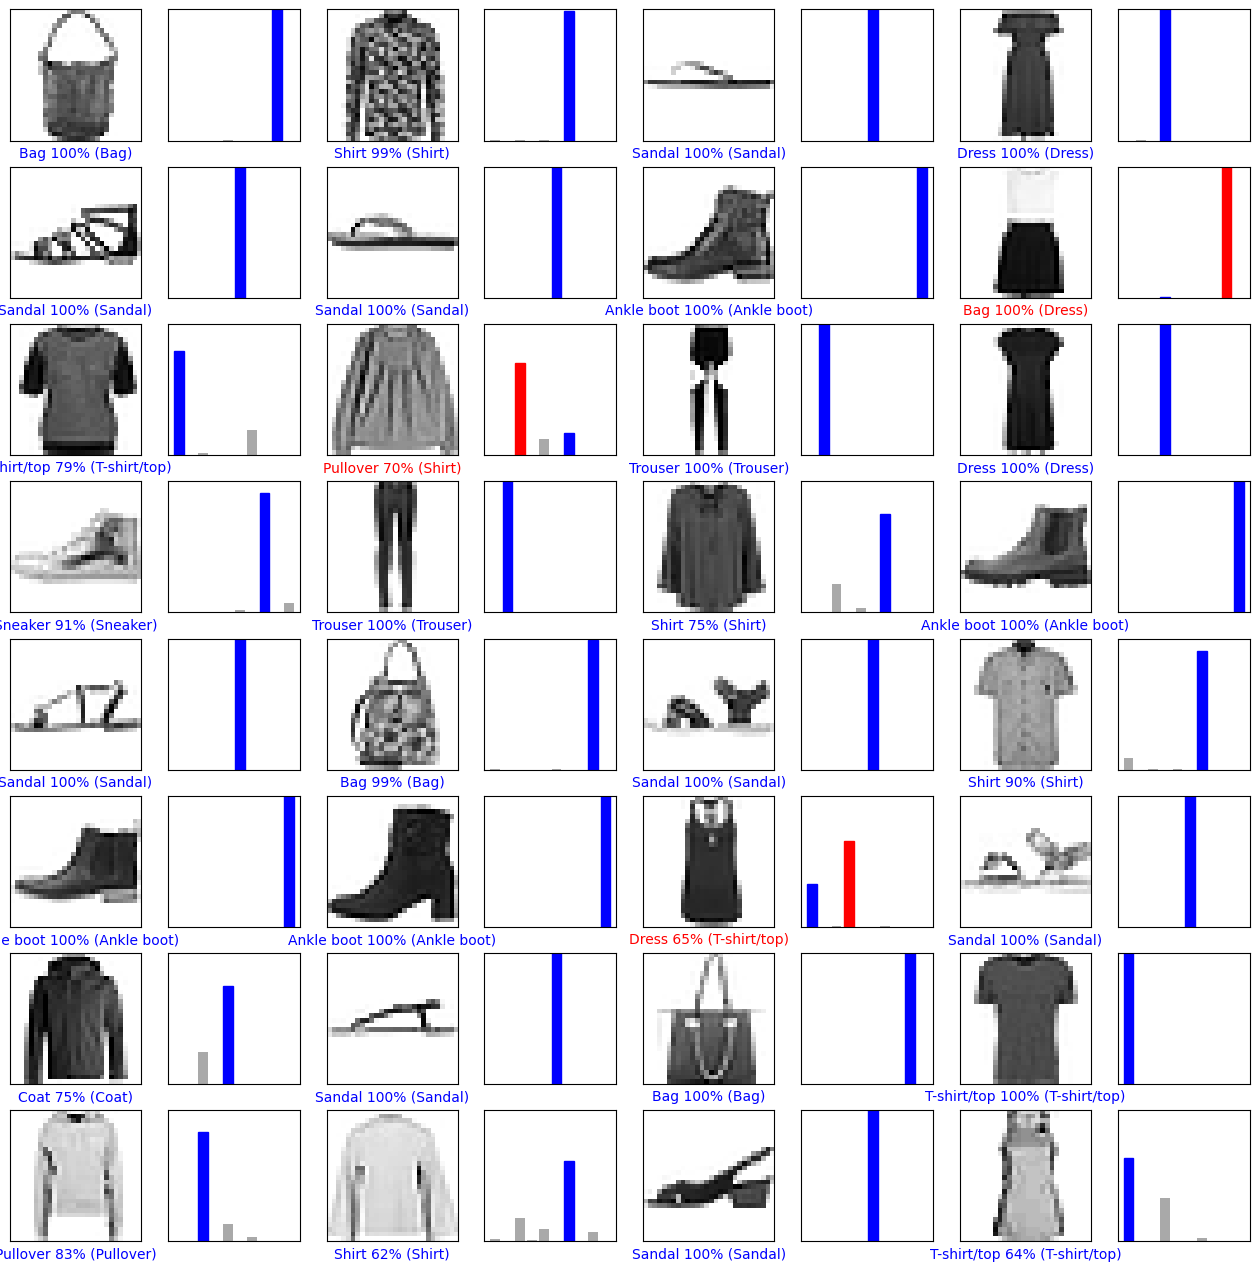

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.79      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.74      0.82      0.78      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.79      0.79      0.79      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.70      0.66      0.68      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



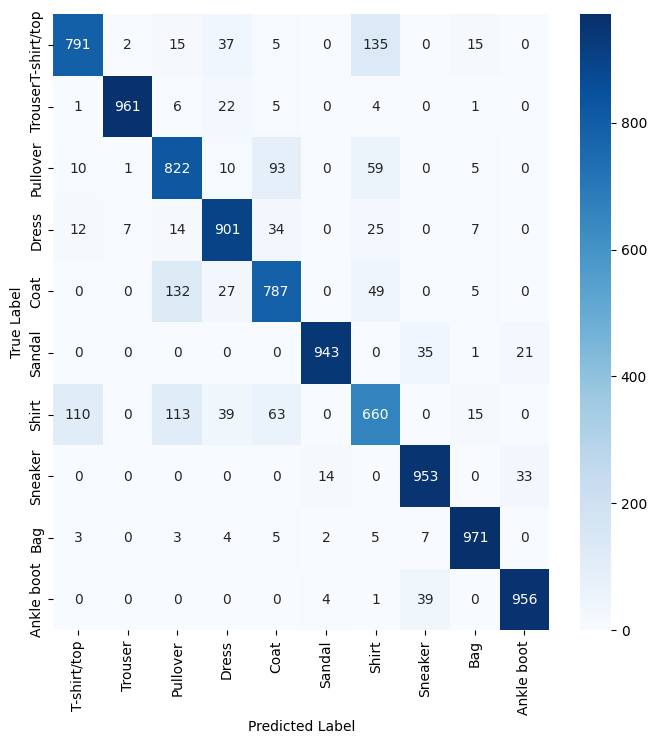

In [74]:
# prompt: 모델 결과 분석
# 랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화합니다.

# 테스트 데이터에서 랜덤으로 32개 이미지 선별
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)

# 선별된 이미지에 대한 예측 수행
# 최적화된 모델 (history7에 해당)으로 예측을 수행해야 합니다.
# 현재 코드는 model이라는 변수가 history7의 학습 결과를 담고 있습니다.
pred_ys_optimized = model.predict(x_test)
arg_pred_ys_optimized = np.argmax(pred_ys_optimized, axis=1)


plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    # plot_image 함수는 모델의 예측 결과와 실제 레이블을 비교하여 시각화합니다.
    # 여기서는 최적화된 모델의 예측 결과 (pred_ys_optimized)를 사용합니다.
    plot_image(num, pred_ys_optimized, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    # plot_class 함수는 모델의 클래스별 예측 확률을 시각화합니다.
    # 여기서는 최적화된 모델의 예측 결과 (pred_ys_optimized)를 사용합니다.
    plot_class(num, pred_ys_optimized, y_test)

plt.show()

# 최적화된 모델의 Classification Report
print(classification_report(y_test, arg_pred_ys_optimized, target_names=class_names))

# 최적화된 모델의 Confusion Matrix
plt.figure(figsize=(8, 8))
cm_optimized = confusion_matrix(y_test, arg_pred_ys_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.79      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.74      0.82      0.78      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.79      0.79      0.79      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.70      0.66      0.68      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



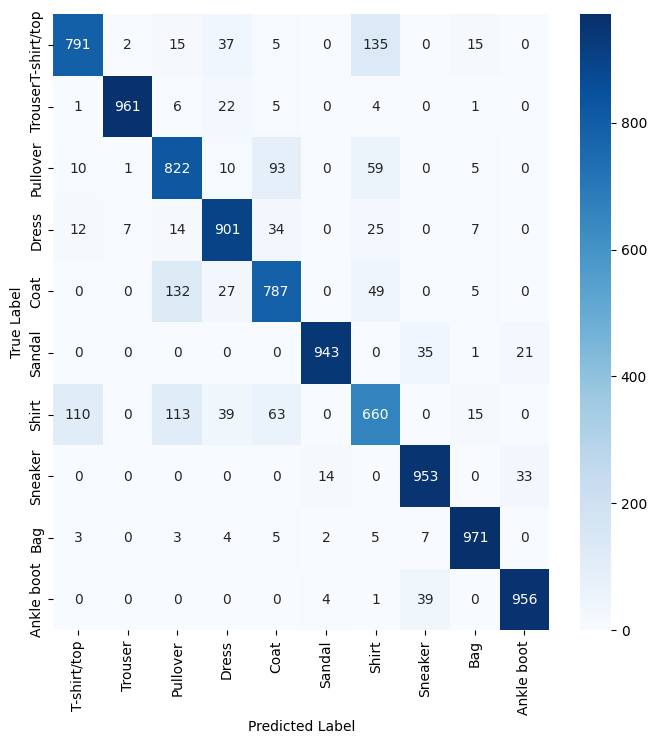

In [75]:
# prompt: 최적화한 모델의 분류 결과를 클래스별로 성능 지표를 살펴봅니다.

# 최적화된 모델의 Classification Report
print(classification_report(y_test, arg_pred_ys_optimized, target_names=class_names))

# 최적화된 모델의 Confusion Matrix
plt.figure(figsize=(8, 8))
cm_optimized = confusion_matrix(y_test, arg_pred_ys_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

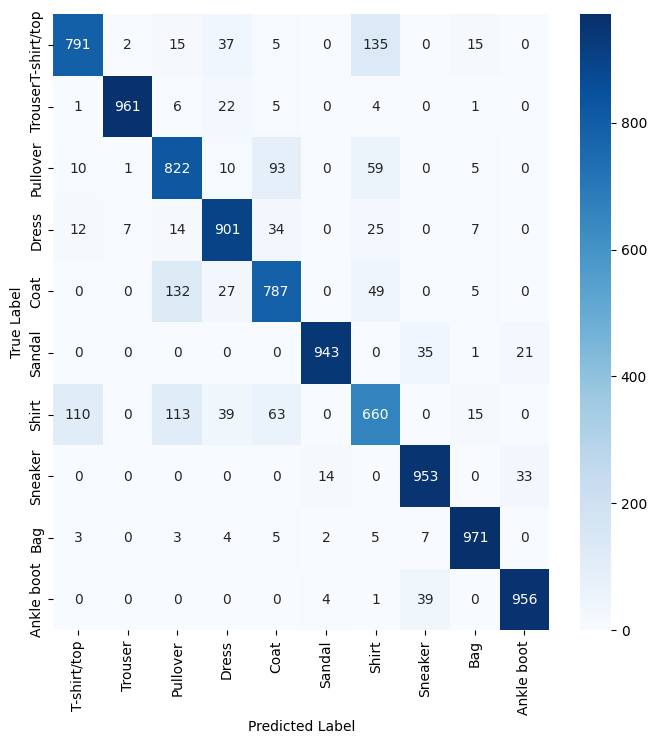

In [76]:
# prompt: 모델의 결과를 혼동 행렬를 통해서 시각화합니다.

# 최적화된 모델의 Confusion Matrix
plt.figure(figsize=(8, 8))
cm_optimized = confusion_matrix(y_test, arg_pred_ys_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- Fashion MNIST를 분류하는 딥러닝 모델이 최적화를 통해서 기본 모델 보다 상당히 높은 성능을 보여주는 것을 알 수 있습니다. 그러나 최적화를 수행하여도 모델 평가 결과는 90%를 넘기기 어렵습니다.

딥러닝 모델에서 구조적으로 이미지를 입력으로 사용할 때 적합한 CNN(Convolution Neural Network) 계열의 아키텍처가 있고, 텍스트를 입력으로 사용할 때 적합한 RNN(Recurrent Neural Network) 계열의 아키텍처가 있습니다. 즉, 기본적인 신경망 구조가 아닌 입력되는 데이터의 특성을 고려한 아키텍처가 필요합니다. 이러한 아키텍처와 모델들은 컴퓨터비전과 자연어처리 과정을 통해서 학습